In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [10]:
data =pd.read_csv('/content/gld_price_data.csv')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [15]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
# it is a regression problem
#correlation is involved


In [17]:
correlation = data.drop('Date' , axis=1).corr()

<Axes: >

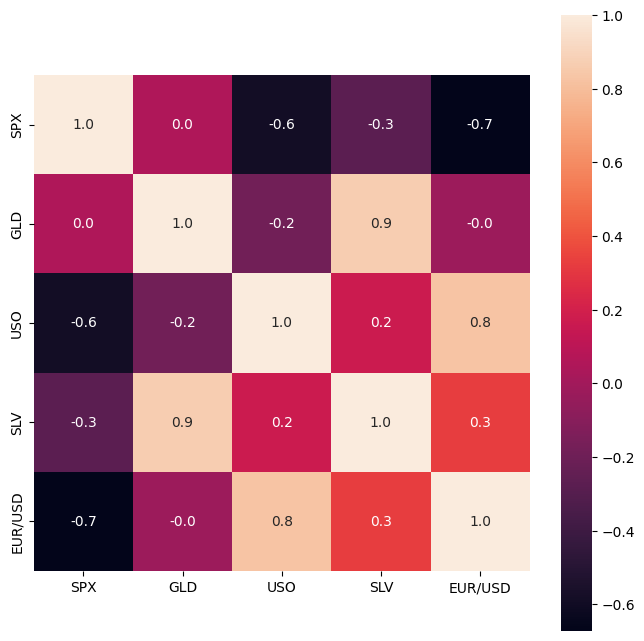

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation , annot=True,cbar = True , square = True , fmt='.1f')

In [19]:
# In the above figure or heatmap it tells us that the number that are -ve are -ve correlated and +ve are +ve correlated
# Meaning that if one inc. the other dec. viceversa (for -ve correlation) in +ve correlation if it inc. the other also inc. viceversa

In [20]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-21-250e2386ee90>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'] , color ='Green')


<Axes: xlabel='GLD', ylabel='Density'>

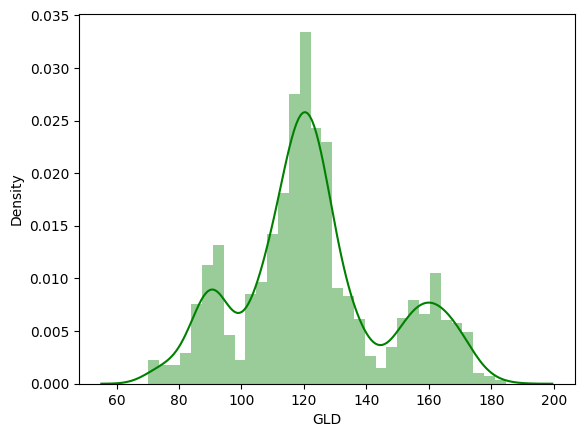

In [21]:
sns.distplot(data['GLD'] , color ='Green')

In [22]:
# Splitting data into x and y
x =data.drop(['GLD' ,'Date'] , axis =1)
y = data['GLD']

In [23]:
x_train ,x_test ,y_train , y_test = train_test_split(x,y ,test_size=0.2 , random_state=2)

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
prediction = regressor.predict(x_test)

In [28]:
print(prediction)

[168.59879956  81.59659988 116.1661001  127.81410083 120.54540131
 154.57669892 150.26979851 126.0504005  117.37609871 126.09430038
 116.53100137 170.76770064 141.57269914 167.68499844 115.30099993
 117.24940037 137.51290313 170.52840094 159.26600301 161.67129979
 155.13870004 125.38030046 175.05929986 156.7759041  125.23860005
  93.71699973  77.09880024 120.40689991 119.07679933 167.45089937
  88.16730075 125.25530048  91.24190078 117.66930006 121.18389892
 136.33810078 115.77610085 114.90890087 146.1010996  107.34650125
 104.54920254  87.17829799 126.59169998 117.81529961 153.60729937
 119.72239999 108.46740005 108.14099847  93.17910052 127.16599753
  75.24890003 113.60459891 121.6316001  111.31769924 118.83219885
 120.45239962 159.41960075 169.41530094 146.89269651  85.89709872
  94.51310033  86.93269913  90.4727001  118.86490084 126.40730063
 127.42359996 170.63769985 122.34479951 117.3807991   98.50500031
 168.68070013 143.1169979  131.85210242 121.2023021  121.1708996
 119.859700

In [30]:
print(f'The error score is :{metrics.r2_score(prediction,y_test)}')

The error score is :0.9892164913412387


In [32]:
# Compare the Actual Value and The Predicted Values


In [34]:
y_test = list( y_test)

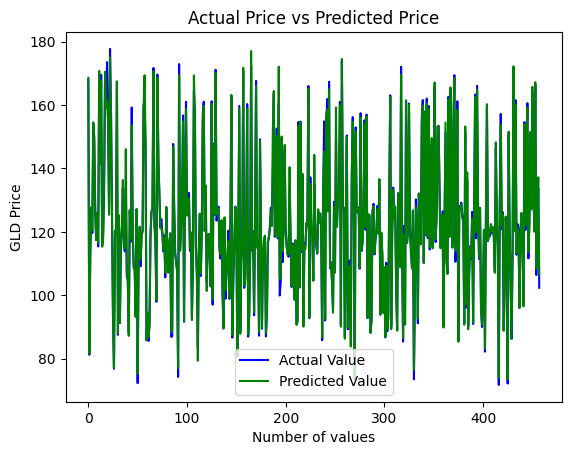

In [39]:
plt.plot(y_test , color ='blue' , label ='Actual Value')
plt.plot(prediction , color ='green' , label ='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()